# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

565

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#query url to use to get responses
query_url = url + "appid=" + api_key + "&q="

#initiate count
counter = 1

#empty lists to populate
lat = []
lng = []
city_name = []
temp = []
humidity = []
clouds = []
windy = []

print("Beginning Data Retrieval")
print("------------------------")
#loop through each city and find needed elements, then place those elements in empy lists above
for x in cities:
    try:
        response = (requests.get(query_url + x)).json()
        city_name.append(response['name'])
        windy.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        print(f"Processing Record {counter} | {x}")
        counter = counter + 1
    except:
        print(f"City not found. Skipping...")
        counter = counter + 1

Beginning Data Retrieval
------------------------
Processing Record 1 | castro
Processing Record 2 | kitimat
Processing Record 3 | vaini
Processing Record 4 | hithadhoo
Processing Record 5 | port elizabeth
Processing Record 6 | ketchikan
Processing Record 7 | east london
Processing Record 8 | mataura
Processing Record 9 | albany
Processing Record 10 | mar del plata
Processing Record 11 | katsuura
Processing Record 12 | saskylakh
Processing Record 13 | norman wells
Processing Record 14 | tilichiki
Processing Record 15 | mamallapuram
Processing Record 16 | hilo
Processing Record 17 | leshukonskoye
Processing Record 18 | qaanaaq
Processing Record 19 | mudgee
Processing Record 20 | hermanus
Processing Record 21 | margate
Processing Record 22 | busselton
Processing Record 23 | dingle
Processing Record 24 | kondagaon
Processing Record 25 | tuatapere
Processing Record 26 | avarua
Processing Record 27 | cape town
Processing Record 28 | bonavista
Processing Record 29 | dikson
Processing Record 

Processing Record 250 | penzance
Processing Record 251 | krasnovishersk
Processing Record 252 | tobol
Processing Record 253 | luanshya
Processing Record 254 | mehamn
Processing Record 255 | matara
Processing Record 256 | belmonte
Processing Record 257 | sheridan
Processing Record 258 | quimper
City not found. Skipping...
Processing Record 260 | parana
City not found. Skipping...
Processing Record 262 | klaksvik
Processing Record 263 | esperance
Processing Record 264 | moose factory
Processing Record 265 | tutoia
Processing Record 266 | touros
Processing Record 267 | turtas
Processing Record 268 | kaitangata
Processing Record 269 | laguna
Processing Record 270 | valdivia
Processing Record 271 | mahibadhoo
Processing Record 272 | slave lake
City not found. Skipping...
Processing Record 274 | ocos
Processing Record 275 | yermish
Processing Record 276 | aksu
Processing Record 277 | coquimbo
Processing Record 278 | svay rieng
Processing Record 279 | airai
City not found. Skipping...
Process

Processing Record 504 | mount isa
Processing Record 505 | maua
Processing Record 506 | roma
Processing Record 507 | kharp
City not found. Skipping...
Processing Record 509 | kamenka
Processing Record 510 | marawi
Processing Record 511 | faya
Processing Record 512 | nelidovo
Processing Record 513 | hobyo
Processing Record 514 | labuhan
Processing Record 515 | cape coast
Processing Record 516 | sabratah
Processing Record 517 | anloga
Processing Record 518 | merauke
Processing Record 519 | alekseyevsk
Processing Record 520 | nabire
Processing Record 521 | peleduy
Processing Record 522 | naryan-mar
City not found. Skipping...
Processing Record 524 | zaraza
Processing Record 525 | acapulco
Processing Record 526 | bizhbulyak
Processing Record 527 | belaya gora
Processing Record 528 | banda aceh
Processing Record 529 | shirokiy
Processing Record 530 | la ronge
Processing Record 531 | broome
Processing Record 532 | marsa matruh
Processing Record 533 | jardim
Processing Record 534 | severomuysk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather = {"Latitude": lat, 
           "Longitude": lng, 
           "City": city_name, 
           "Temperature": temp, 
           "Humidity": humidity, 
           "Cloudiness": clouds, 
           "Wind Speeds": windy}

In [8]:
weather_df = pd.DataFrame(weather)
weather_df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speeds
0,-42.48,-73.76,Castro,284.15,62,0,3.10
1,54.02,-128.69,Kitimat,279.15,93,90,4.10
2,15.34,74.49,Vaini,293.27,97,99,0.05
3,-0.60,73.08,Hithadhoo,300.22,77,6,4.80
4,39.31,-74.98,Port Elizabeth,290.46,59,1,3.52


In [9]:
#save CSV Weather Dataframe
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

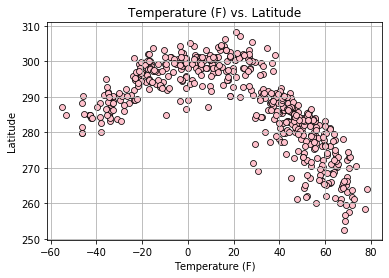

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], edgecolors="black", facecolors="pink", linewidths = 0.75)
plt.grid()
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")
plt.savefig("../Images/Temp_v_Lat.png")
plt.show()

#### Latitude vs. Humidity Plot

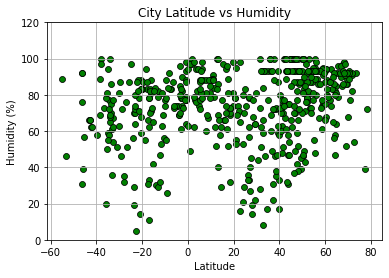

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black", facecolors="green", linewidths = 0.75)
plt.grid()
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0, 120)
plt.savefig("../Images/Humidity_v_Lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot

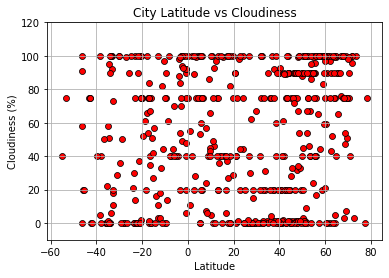

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="black", facecolors="red", linewidths = 0.75)
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 120)
plt.savefig("../Images/Cloudiness_v_Lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot

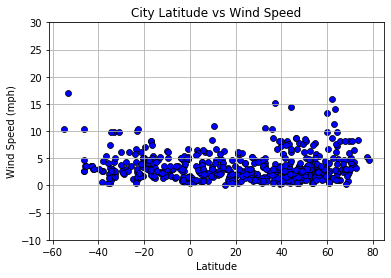

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speeds"], edgecolors="black", facecolors="blue", linewidths = 0.75)
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-10, 30)
plt.savefig("../Images/Wind_v_Lat.png")
plt.show()